## 🐶🐱 **Clasificador de Imágenes: Perros vs Gatos**
- hecho por: John Fredy Beltran Cuellar
- Fecha: 11/22/2025
- Meta: Este proyecto buscó desarrollar un modelo de clasificación de imágenes con un flujo reproducible y organizado, desde la carga de datos hasta la evaluación final, con el fin de demostrar técnicas prácticas de machine learning aplicadas a visión computacional.



In [16]:
# step 0. cargar librerias
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import load_model


In [8]:
# step 1 cargar datos
train_path = r"C:/Users/jhonf/Clasificador_de_imagenes_Perros_y_Gatos/dogs-vs-cats/dogs-vs-cats/train"
val_path = r"C:/Users/jhonf/Clasificador_de_imagenes_Perros_y_Gatos/dogs-vs-cats/dogs-vs-cats/validation"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

val_data = datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


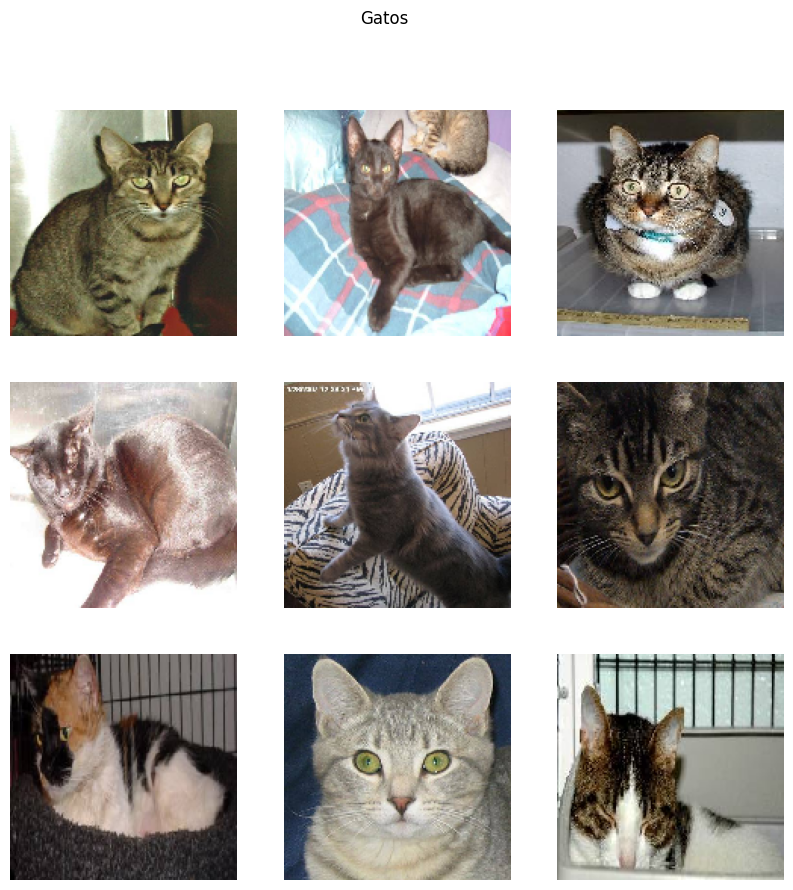

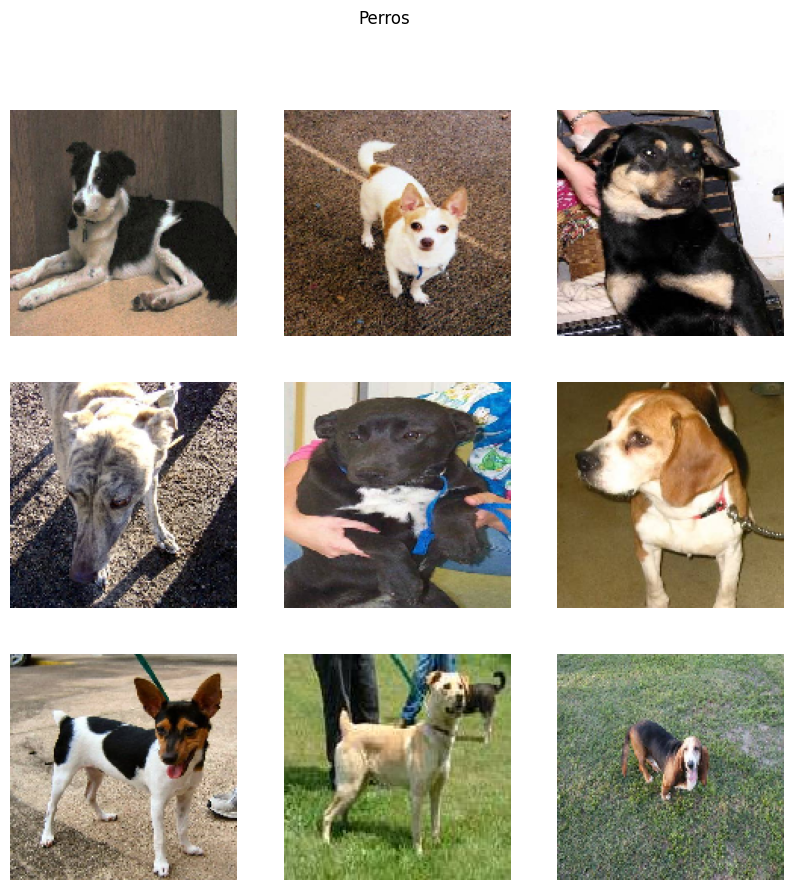

In [9]:
# visualizar 9 imagenes de cada clase
def plot_images(data, label_index, title):
    images = []
    labels = []
    count = 0
    for img, label in data:
        for i in range(len(label)):
            if label[i][label_index] == 1:
                images.append(img[i])
                labels.append(label[i])
                count += 1
                if count == 9:
                    break
        if count == 9:
            break

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_images(train_data, label_index=0, title="Gatos")
plot_images(train_data, label_index=1, title="Perros")


In [10]:
# construir el modelo CNN tipo VGG16

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Para clasificación binaria con categorical labels
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [11]:
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_accuracy", save_best_only=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.5825 - loss: 0.7653

625/625 ━━━━━━━━━━━━━━━━━━━━ 348s 556ms/step - accuracy: 0.6301 - loss: 0.6586 - val_accuracy: 0.6820 - val_loss: 0.6034
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7256 - loss: 0.5479

625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 268ms/step - accuracy: 0.7323 - loss: 0.5399 - val_accuracy: 0.7404 - val_loss: 0.5257
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8099 - loss: 0.4145

625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8101 - loss: 0.4104 - val_accuracy: 0.7652 - val_loss: 0.5109
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 241ms/step - accuracy: 0.8863 - loss: 0.2644 - val_accuracy: 0.7590 - val_loss: 0.6133
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 244ms/step - accuracy: 0.9579 - loss: 0.1128 - val_accuracy: 0.7522 - val_loss: 0.7829
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 281ms/step - accuracy: 0.9848 - loss: 0.0473 - val_accuracy: 0.7512 - val_loss: 1.1377


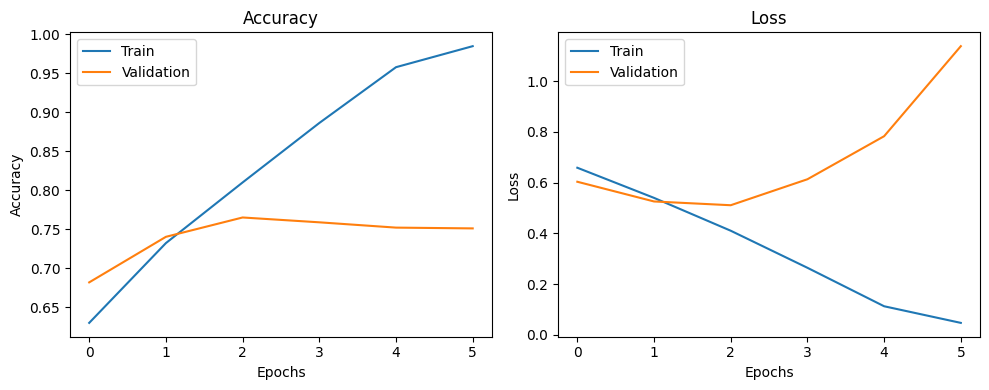

In [12]:
# evaluacion y visualizacion
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()



In [18]:
# guardar el modelo final
model.save("dogs_vs_cats_final_model.keras")


## prueba del modelo con imagen externa

c:\Users\jhonf\Clasificador_de_imagenes_Perros_y_Gatos\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


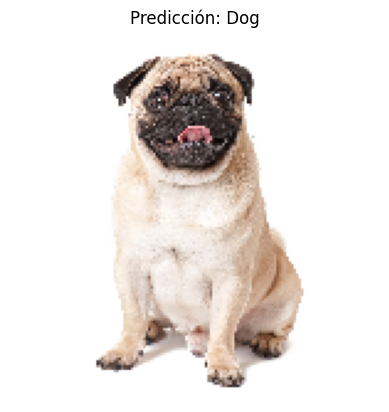

In [19]:
# modelo para perro
# Cargar modelo entrenado
model = load_model("dogs_vs_cats_final_model.keras")

# Ruta de la imagen
img_path = r"C:\Users\jhonf\Clasificador_de_imagenes_Perros_y_Gatos\perro pug.jpg"

# Cargar y preprocesar imagen
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predicción
prediction = model.predict(img_array)
classes = ["Cat", "Dog"]
predicted_class = classes[np.argmax(prediction)]

# Mostrar imagen + resultado
plt.imshow(img)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


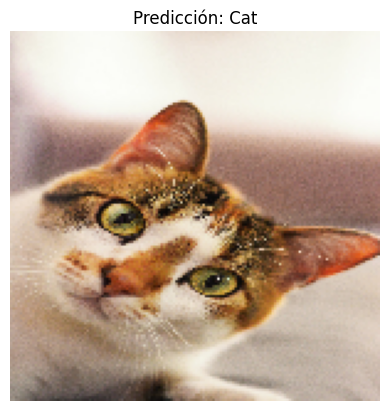

In [20]:
# modelo para gato
# Cargar modelo entrenado
model = load_model("dogs_vs_cats_final_model.keras")

# Ruta de la imagen
img_path = r"C:\Users\jhonf\Clasificador_de_imagenes_Perros_y_Gatos\gato.jpg"

# Cargar y preprocesar imagen
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predicción
prediction = model.predict(img_array)
classes = ["Cat", "Dog"]
predicted_class = classes[np.argmax(prediction)]

# Mostrar imagen + resultado
plt.imshow(img)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


## **conclucion**  
Se logró implementar un flujo completo y estructurado para la clasificación de imágenes, integrando preprocesamiento, entrenamiento y evaluación de modelos. El proyecto evidencia la importancia de la reproducibilidad y la claridad en cada etapa, sentando bases sólidas para futuros trabajos y mejoras.
